In [2]:
import os
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [3]:
#reading and printing the image using cv2 
#the image is printed in the format of an array 
img1=cv2.imread(r'C:\Users\Rohit94\Documents\project_2023\Liver Cancer\Training\Tumour\img (1).jfif')
print(img1)

None


TypeError: Image data of dtype object cannot be converted to float

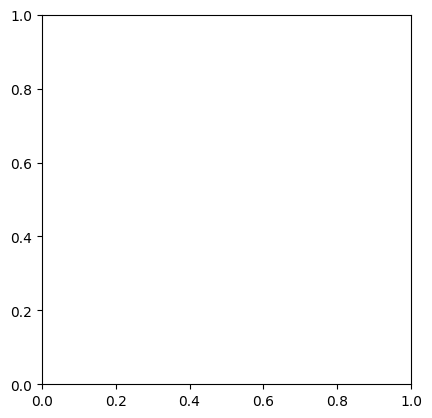

In [5]:
#previewing the image using open cv
plt.imshow(img1)

In [ ]:
#evaluating the size of the image 
print("the shape of the image ")
print(img1.shape)
#so we can see that the image has height=64 px , width=64 px , channel= 3
#so the image is an rgb image 

the shape of the image 
(800, 800, 3)


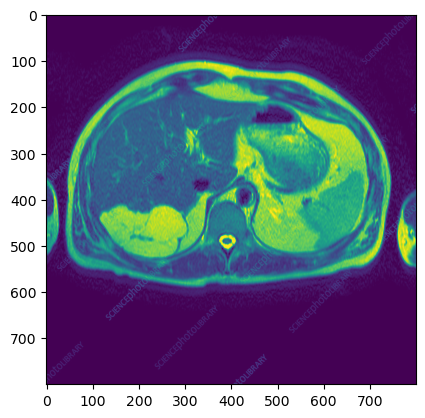

In [ ]:
#converting the rgb image to an grayscale image 
img_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [ ]:
print("the shape of the converted image")
img_gray.shape

the shape of the converted image


(800, 800)

In [ ]:
#Checking the array format of the single channel image 
img_gray

array([[ 0,  0,  0, ...,  5,  2,  7],
       [ 0,  0,  0, ..., 20,  8,  0],
       [ 0,  0,  0, ..., 16,  7,  0],
       ...,
       [19, 25, 23, ...,  0,  0,  0],
       [27, 21, 11, ...,  0,  0,  0],
       [11,  4,  0, ...,  0,  0,  0]], dtype=uint8)

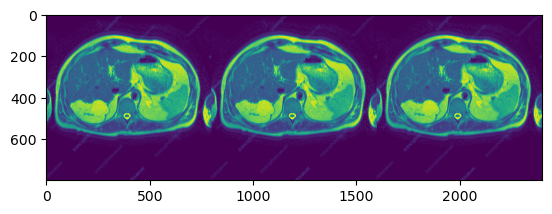

In [ ]:
#playing with the colors of the image 
import numpy as np
imgblue=img1[:,:,0]
imggreen=img1[:,:,1]
imgred=img1[:,:,2]
new_image=np.hstack((imgblue,imggreen,imgred))
plt.imshow(new_image)

In [ ]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

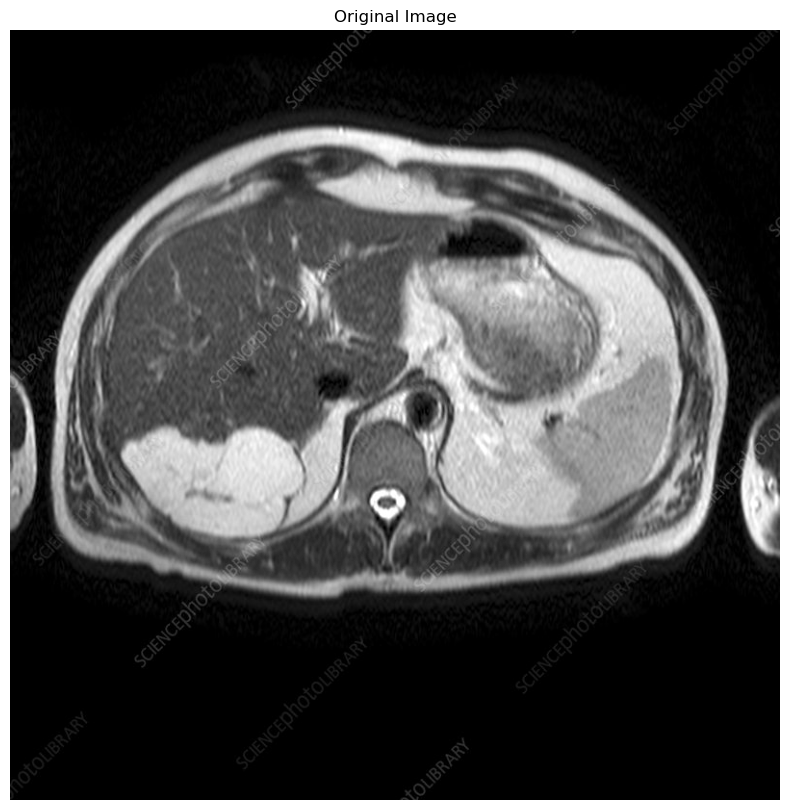

In [ ]:
img=cv2.imread(r'C:\Users\Rohit94\Documents\project_2023\Liver Cancer\Training\Tumour\img (1).jfif')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ShowImage('Original Image',gray,'gray')
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

Image Data
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 5  5  5]
  [ 2  2  2]
  [ 7  7  7]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [20 20 20]
  [ 8  8  8]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [16 16 16]
  [ 7  7  7]
  [ 0  0  0]]

 ...

 [[19 19 19]
  [25 25 25]
  [23 23 23]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[27 27 27]
  [21 21 21]
  [11 11 11]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[11 11 11]
  [ 4  4  4]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


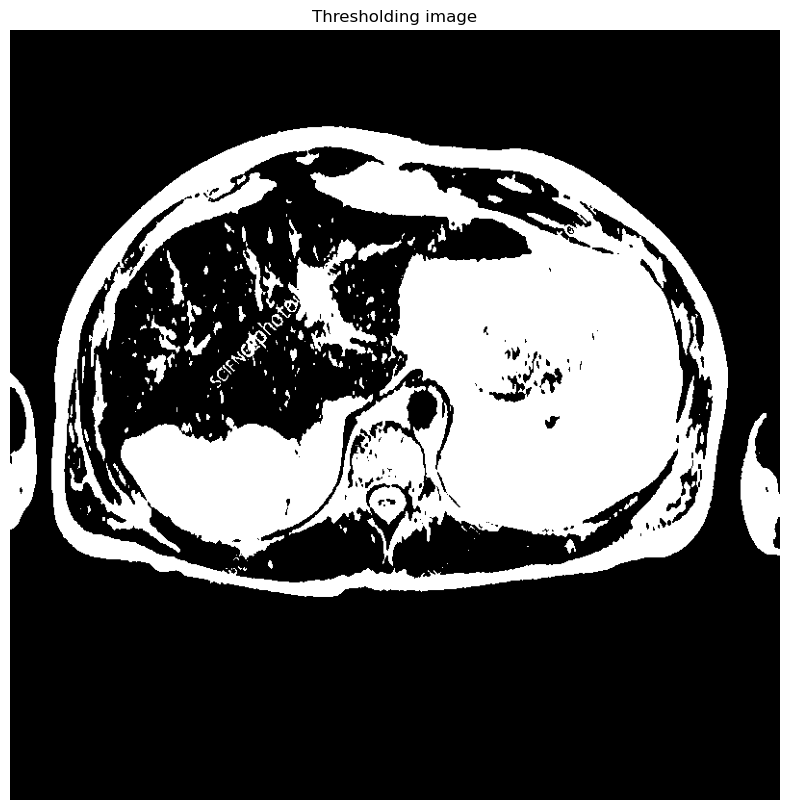

True

In [ ]:
    print('Image Data')
    print(img)
    ShowImage('Thresholding image',thresh,'gray')
    cv2.imwrite('thresh.jpg',thresh)


In [ ]:
#import module
import cv2 as cv
import numpy as np

In [ ]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray Image",gray_image )
cv.waitKey(0)

-1

In [ ]:
#detect edges
canny = cv.Canny(gray_image, 215, 275)

In [ ]:
#identify contours
contours, hierarchies = cv.findContours(canny,cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

#draw contours on image
cv.drawContours(img, contours, -1, (0,0,255), 2)
#show contours outlining on image
cv.imshow("Contours",img)

#wait till infinity
cv.waitKey(0)

-1

In [ ]:
# blank = np.zeros(img.shape, dtype='uint8')

# #convert to gray scale
# gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# #detect edges
# canny = cv.Canny(gray_image, 215, 275)

# #identify contours
# contours, hierarchies = cv.findContours(canny,cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# #draw contours on blank image
# cv.drawContours(blank, contours, -1, (0,  255,0), 1)

# #show contours outlining on image
# cv.imshow("Contours on Blank",blank)

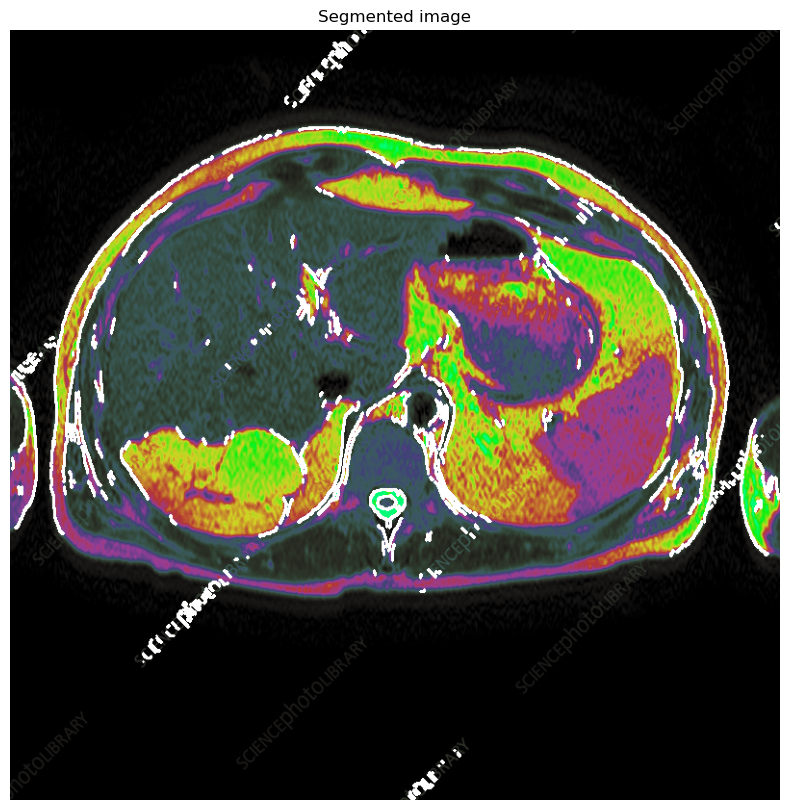

In [ ]:
im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
ShowImage('Segmented image',im1,'gray')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [9]:
images_dir = r"C:\Users\Rohit94\Documents\project_2023\Liver Cancer\Training"

In [10]:
batch_size = 5
img_height = 300
img_width = 300

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

NotFoundError: Could not find directory C:\Users\Rohit94\Documents\project_2023\Liver Cancer\Training

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 122 files belonging to 2 classes.
Using 24 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

NameError: name 'train_ds' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

NameError: name 'train_ds' is not defined

<Figure size 1000x1000 with 0 Axes>

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(5, 300, 300, 3)
(5,)


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.015794111 1.0


In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
20/20 [==============================] - 5s 192ms/step - loss: 0.6366 - accuracy: 0.7347 - val_loss: 0.5026 - val_accuracy: 0.7083
Epoch 2/15
20/20 [==============================] - 4s 182ms/step - loss: 0.2888 - accuracy: 0.8980 - val_loss: 1.0778 - val_accuracy: 0.7083
Epoch 3/15
20/20 [==============================] - 4s 177ms/step - loss: 0.2216 - accuracy: 0.8776 - val_loss: 0.4976 - val_accuracy: 0.7917
Epoch 4/15
20/20 [==============================] - 4s 179ms/step - loss: 0.1804 - accuracy: 0.9286 - val_loss: 0.3246 - val_accuracy: 0.7917
Epoch 5/15
20/20 [==============================] - 4s 178ms/step - loss: 0.2178 - accuracy: 0.9286 - val_loss: 0.2937 - val_accuracy: 0.7917
Epoch 6/15
20/20 [==============================] - 4s 186ms/step - loss: 0.2059 - accuracy: 0.9286 - val_loss: 0.2915 - val_accuracy: 0.7917
Epoch 7/15
20/20 [==============================] - 4s 179ms/step - loss: 0.1805 - accuracy: 0.9082 - val_loss: 0.5346 - val_accuracy: 0.7917
Epoch 

In [ ]:
model.save("liver_cancer.h5")

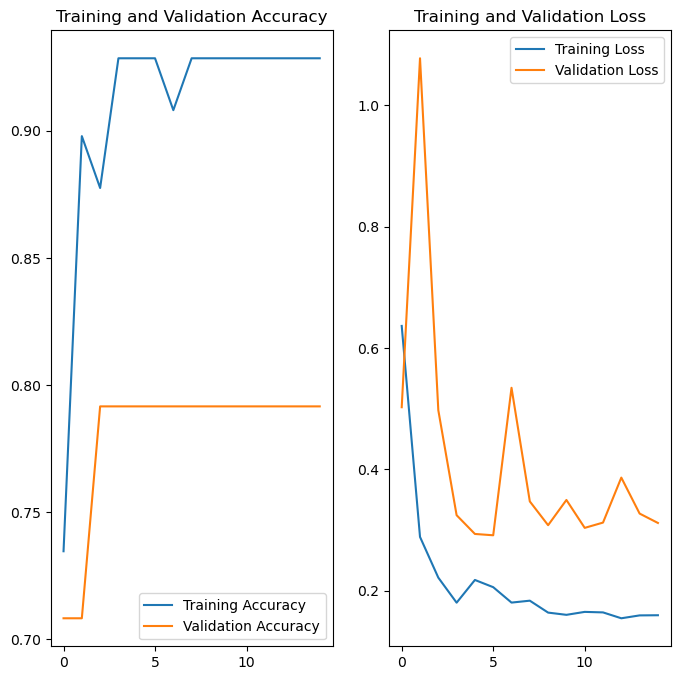

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    images_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 114 images belonging to 2 classes.


C:\Users\Rohit94\AppData\Local\Temp\ipykernel_23092\2664318057.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

  Non Tumour       0.86      1.00      0.92        72
      Tumour       1.00      0.71      0.83        42

    accuracy                           0.89       114
   macro avg       0.93      0.86      0.88       114
weighted avg       0.91      0.89      0.89       114



In [ ]:
model=Sequential()

In [ ]:
from tensorflow.keras.layers import BatchNormalization
#covolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(3,activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                      

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


C:\Users\Rohit94\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 [==============================] - 6s 254ms/step - loss: 4.4348 - accuracy: 0.7551 - val_loss: 5.0054 - val_accuracy: 0.5833
Epoch 2/10
20/20 [==============================] - 5s 247ms/step - loss: 1.4100 - accuracy: 0.8878 - val_loss: 8.0708 - val_accuracy: 0.7500
Epoch 3/10
20/20 [==============================] - 5s 233ms/step - loss: 2.6212 - accuracy: 0.8673 - val_loss: 3.5684 - val_accuracy: 0.7083
Epoch 4/10
20/20 [==============================] - 5s 237ms/step - loss: 1.4234 - accuracy: 0.8878 - val_loss: 3.6858 - val_accuracy: 0.7917
Epoch 5/10
20/20 [==============================] - 5s 238ms/step - loss: 3.4208 - accuracy: 0.8878 - val_loss: 0.8945 - val_accuracy: 0.8333
Epoch 6/10
20/20 [==============================] - 5s 231ms/step - loss: 0.9339 - accuracy: 0.9184 - val_loss: 3.6451 - val_accuracy: 0.7917
Epoch 7/10
20/20 [==============================] - 5s 234ms/step - loss: 1.4379 - accuracy: 0.8571 - val_loss: 5.9786 - val_accuracy: 0.7917
Epoch 8/10
20/20 